<a href="https://colab.research.google.com/github/LathaReddybattula/HDS5210_InClass-Latha/blob/master/final/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS 5210 Final Project: Type 2 Diabetes prevalence in different population, symptoms and related COVID 19 deaths in Multiple Data Sets.

Project Overview:

Focuses on diabetes data and its connection to COVID-19-related deaths in the United States.
Utilizes three data sources and two file types (CSV and Excel).
Data Sources:

CDC (HealthData.gov):
Data on COVID-19 mortality due to diabetes complications (2020-2022).
UCI Dataset: Includes diabetes data from 130 U.S. hospitals collected over 10 years, provided by the Center for Clinical and Translational Research at Virginia Commonwealth University.
Kaggle Dataset: Contains information on diabetes symptoms and prevalence.
Project Objectives:

Analyzing diabetes symptoms and their prevalence across different populations.
Studying gender-based variations in diabetes.
Examining hospital stay data and treatment strategies for diabetes.
Investigating COVID-19 deaths linked to diabetes complications.

All data/documentation can be found at the following links:

 * HealthData.gov :

 Documentation: https://healthdata.gov/dataset/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/uvkj-kpue

 Data:  https://data.cdc.gov/api/views/hk9y-quqm/rows.csv?accessType=DOWNLOAD

 File name: `covid19_deaths_dm.xlsx`

* UCI Data set:

 Documentation: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

 Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip

 File name: `diabetic_data.csv`

* Kaggle web site data:

 Documentation: https://www.kaggle.com/datasets/alakaaay/diabetes-uci-dataset

 Data: https://www.kaggle.com/datasets/alakaaay/diabetes-uci-dataset

 File name: `diabetes_symptoms.csv`



All Files were saved to the `/final` directory for easy access.  

## Approach for data management:
There are 3 sources of data documented below

## This notebook is divided into 3 parts


## Part A: Diabetes Data from UCI Dataset
The dataset represents a decade of clinical care data collected from 130 U.S. hospitals and integrated delivery networks. It comprises over 50 features related to patient demographics, hospital outcomes, and treatment details. The data includes inpatient encounters where diabetes was recorded as a diagnosis, with hospital stays ranging between 1 and 14 days. All encounters involve laboratory tests and administered medications.

Key attributes include patient demographics (race, gender, age), admission type, time spent in the hospital, the medical specialty of the admitting physician, and results of tests like HbA1c. It also captures medication data for 24 drugs, including insulin and other diabetes-related medications. For these medications, changes in dosage are recorded with values such as “up” (increased), “down” (decreased), “steady” (unchanged), and “no” (not prescribed). This rich dataset enables an analysis of diabetes prevalence across populations and genders, as well as patterns in hospital stays, medications, and treatments.

## Part B: Kaggle Dataset on Diabetes Symptoms
This dataset focuses on diabetes symptoms and was collected using patient questionnaires at Sylhet Diabetes Hospital in Bangladesh, with approval from medical professionals. It includes attributes such as age, gender, and various symptoms like polyuria, polydipsia, sudden weight loss, weakness, itching, visual blurring, delayed healing, and more. The data also categorizes patients as either diabetic-positive or diabetic-negative.

By analyzing this dataset, we aim to identify the most common symptoms experienced by diabetic patients, the age groups most affected, and the gender distribution of these symptoms. This information could prove invaluable for early detection and prevention strategies, as well as helping healthcare providers implement symptomatic precautions to manage diabetes more effectively.

## Part C: CDC Data on COVID-19 Deaths and Diabetes
This dataset examines health conditions, including diabetes, that were associated with COVID-19-related deaths in the U.S. The data categorizes cases by age group and jurisdiction of occurrence, providing a detailed view of the role diabetes played as a risk factor during the pandemic.

The focus here is to explore how diabetes complications contributed to COVID-19 mortality and to highlight the specific age groups and populations most affected. While the datasets from UCI, Kaggle, and the CDC originate from different locations (the U.S. and Bangladesh) and study designs, the overarching goal is to examine diabetes prevalence, gender and age-based differences, and its connection to COVID-19 risks. This multidimensional analysis will help identify patterns and key insights for diabetes management and public health interventions.

## Data Analysis Part A

In [ ]:
## Data Analysis Part A
## importing all libraries which are helpful to me
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading different files with the commands
diabetes = pd.read_csv('diabetic_data.csv')
covid_dm = pd.read_excel('covid19_deaths_dm.xlsx')
diabetes_symp = pd.read_csv('diabetes_symptoms.csv')
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
diabetes.shape

(101766, 50)

In [ ]:
#now i'm going to Check Missing Values present in this data
def check_missing(dataframe):

    return [[dataframe[c].isna().sum(), c] for c in dataframe.columns]

check_missing(diabetes)

[[0, 'encounter_id'],
 [0, 'patient_nbr'],
 [0, 'race'],
 [0, 'gender'],
 [0, 'age'],
 [0, 'weight'],
 [0, 'admission_type_id'],
 [0, 'discharge_disposition_id'],
 [0, 'admission_source_id'],
 [0, 'time_in_hospital'],
 [0, 'payer_code'],
 [0, 'medical_specialty'],
 [0, 'num_lab_procedures'],
 [0, 'num_procedures'],
 [0, 'num_medications'],
 [0, 'number_outpatient'],
 [0, 'number_emergency'],
 [0, 'number_inpatient'],
 [0, 'diag_1'],
 [0, 'diag_2'],
 [0, 'diag_3'],
 [0, 'number_diagnoses'],
 [96420, 'max_glu_serum'],
 [84748, 'A1Cresult'],
 [0, 'metformin'],
 [0, 'repaglinide'],
 [0, 'nateglinide'],
 [0, 'chlorpropamide'],
 [0, 'glimepiride'],
 [0, 'acetohexamide'],
 [0, 'glipizide'],
 [0, 'glyburide'],
 [0, 'tolbutamide'],
 [0, 'pioglitazone'],
 [0, 'rosiglitazone'],
 [0, 'acarbose'],
 [0, 'miglitol'],
 [0, 'troglitazone'],
 [0, 'tolazamide'],
 [0, 'examide'],
 [0, 'citoglipton'],
 [0, 'insulin'],
 [0, 'glyburide-metformin'],
 [0, 'glipizide-metformin'],
 [0, 'glimepiride-pioglitazone'

In [ ]:
# writing fuction for creating numeric columns for easy understanding.
def create_numeric_feature(input_diabetes):
    use_columns = diabetes_columns
    return input_diabetes_[use_columns].copy()

In [ ]:
##replacing all ? with NaN
diabetes = diabetes.replace("?", np.NaN, )

In [ ]:
#Replacing missing race with previous value – Forward fill

diabetes = diabetes.where(~diabetes.race.isnull(), diabetes.fillna(axis=0, method='ffill'))
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
##now going to find out duplicate IDs in the column:

len(diabetes.encounter_id.unique()) == diabetes.shape[0]

True

In [ ]:
##finding any duplicates in the patient_nbr column:

len(diabetes.patient_nbr.unique()) == diabetes.shape[0]

False

In [ ]:
##analysing how much % of patients have more than 1 encouters:

df1 = diabetes.groupby('patient_nbr').size().sort_values(ascending=False)
df1 = pd.DataFrame(df1)
df1.columns = ['Encounters']
df1['patient_nbr'] = df1.index
df1.reset_index(inplace=True, drop=True)

round((df1.loc[df1.Encounters>1, ].shape[0] / df1.Encounters.sum()) * 100, 2)

16.48

## 16% of the patients had more than one encounters in this data

In [ ]:
## merging 2 dataframe than creating a new dataframe with selected columns:

df2 = pd.merge(df1,
               diabetes[['race', 'gender', 'age', 'patient_nbr']],
               how="left",
               left_on="patient_nbr",
               right_on="patient_nbr")

df2 = df2.drop_duplicates(subset=['patient_nbr'],
                          keep='first',
                          inplace=False)


df2.shape

(71518, 5)

In [ ]:
#how many types of race in this data?

diabetes["race"].value_counts()

,count
race,
Caucasian,77840
AfricanAmerican,19622
Hispanic,2094
Other,1542
Asian,668


## Caucasian population has more risk for getting diabetes followed by AfricanAmericans

In [ ]:
#for easy understanding i used pie chart for different population by Race

Caucasian = diabetes.loc[diabetes["race"]=="Caucasian"].count()[0]
Afro_American = diabetes.loc[diabetes["race"]=="AfricanAmerican"].count()[0]
Hispanic = diabetes.loc[diabetes["race"]=="Hispanic"].count()[0]
Other = diabetes.loc[diabetes["race"]=="Other"].count()[0]
Asian = diabetes.loc[diabetes["race"]=="Asian"].count()[0]

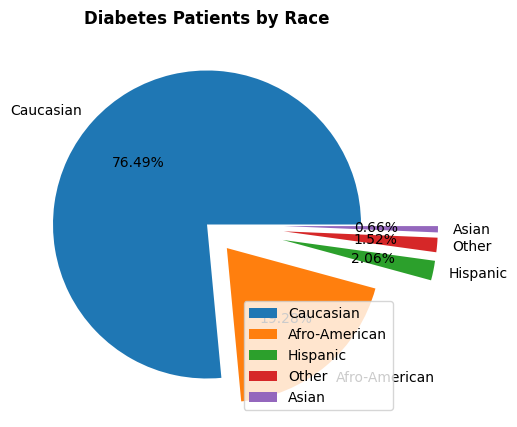

In [ ]:
plt.figure(figsize = [5,5], dpi = 100)
labels = ["Caucasian", "Afro-American", "Hispanic", "Other", "Asian"]
explode = [0,0.2,0.5,0.5,0.5]

plt.pie([Caucasian, Afro_American, Hispanic, Other, Asian], labels = labels, autopct = "%0.2f%%", explode = explode)
plt.title("Diabetes Patients by Race", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

## Caucasian are largest group of diabetic patients diagnosed, followed by Afro-American

In [ ]:
#gender analysis based on the given data

df = diabetes.groupby(["gender"]).size().sort_values(ascending = False)
df

,0
gender,
Female,54708
Male,47055
Unknown/Invalid,3


### Female population is more in this data compared to males

In [ ]:
#creating pie chart based on male and female population data

Male = diabetes.loc[diabetes["gender"]=="Male"].count()[0]
Female = diabetes.loc[diabetes["gender"]=="Female"].count()[0]
Other = diabetes.loc[diabetes["gender"]=="Other"].count()[0]

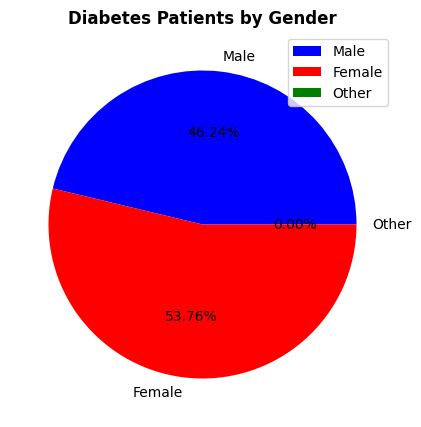

In [ ]:
plt.figure(figsize = [5,5], dpi = 100)
labels = ["Male", "Female", "Other"]
colors = ["Blue", "Red", "Green"]

plt.pie([Male, Female, Other], colors = colors, labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients by Gender", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

## Females are marginally more in number than Males. Others are negligible.

In [ ]:
#Now we are going to group the data by age to know what type of age group is mostly afftected by Diabetes

df = diabetes.groupby(["age"]).size()

In [ ]:
df1 = pd.DataFrame(df)
df1.columns = ["Count"]
df1

,Count
age,
[0-10),161
[10-20),691
[20-30),1657
[30-40),3775
[40-50),9685
[50-60),17256
[60-70),22483
[70-80),26068
[80-90),17197


In [ ]:
#finding % of the each age group in this data

df1["pct"] = (df1["Count"]/(df1["Count"].sum()))*100
df1["pct"]

,pct
age,
[0-10),0.158206
[10-20),0.679009
[20-30),1.628245
[30-40),3.709490
[40-50),9.516931
[50-60),16.956547
[60-70),22.092840
[70-80),25.615628
[80-90),16.898571


In [ ]:
#creating a new data with age count and % of population in that range:

df1

,Count,pct
age,,
[0-10),161,0.158206
[10-20),691,0.679009
[20-30),1657,1.628245
[30-40),3775,3.709490
[40-50),9685,9.516931
[50-60),17256,16.956547
[60-70),22483,22.092840
[70-80),26068,25.615628
[80-90),17197,16.898571


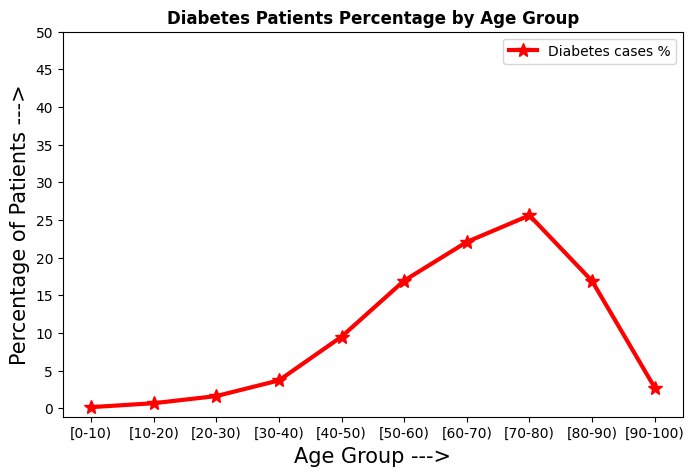

In [ ]:
plt.figure(figsize = [8,5], dpi = 100)

plt.xlabel("Age Group --->", fontdict = { "fontsize": 15})  # to label the axis x and y
plt.ylabel("Percentage of Patients --->", fontdict = { "fontsize": 15})

plt.plot(df1["pct"], label = "Diabetes cases %", color = "red", linewidth = 3, marker = "*", markersize = 10)
plt.title("Diabetes Patients Percentage by Age Group", fontdict = {"fontweight": "bold"})

plt.yticks([0,5,10,15,20,25,30,35,40,45,50])

plt.legend()
plt.show()

### Patients in age group [70-80] forms largest percentage of patients i.e. around 25%. While [0-10] form smallest percentage.

In [ ]:
# finding length of hospital stay by each patient in this data

t_in_h = pd.DataFrame(diabetes["time_in_hospital"].groupby(diabetes["age"]).mean())
t_in_h

,time_in_hospital
age,
[0-10),2.546584
[10-20),3.191027
[20-30),3.564876
[30-40),3.799735
[40-50),4.039649
[50-60),4.125753
[60-70),4.382244
[70-80),4.590878
[80-90),4.808629


In [ ]:
l1 = list(t_in_h.index.values)
l2 = list(t_in_h["time_in_hospital"])

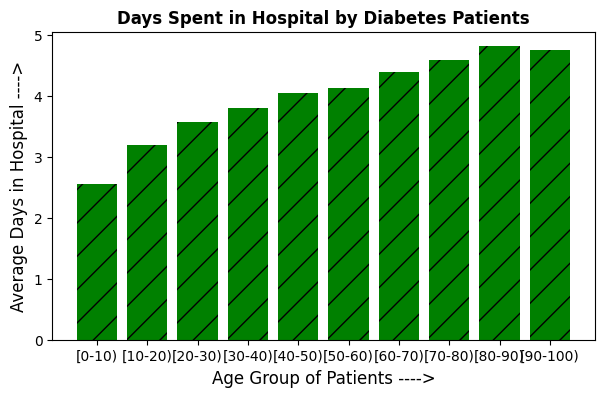

In [ ]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.bar(l1,l2, color = "green", hatch = "/")
plt.ylabel("Average Days in Hospital ---->", fontdict = { "fontsize": 12})
plt.xlabel("Age Group of Patients ---->", fontdict = {"fontsize": 12})

plt.title("Days Spent in Hospital by Diabetes Patients", fontdict = {"fontweight": "bold"})

plt.show()

### Patients in age group of [80-90) spend high number of day in hospital on an average.

In [ ]:
# data transformation with the number of diagnosis and group by age

num_diag = pd.DataFrame(diabetes["number_diagnoses"].groupby(diabetes["age"]).mean())
l1 = list(num_diag.index.values)
l2 = list(num_diag["number_diagnoses"])

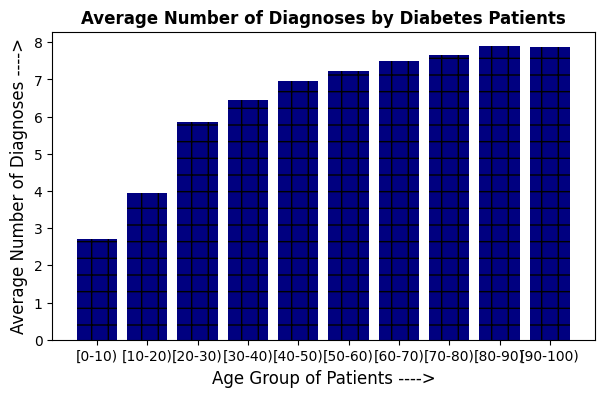

In [ ]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.bar(l1,l2, color = "navy", hatch = "+")
plt.ylabel("Average Number of Diagnoses ---->", fontdict = { "fontsize": 12})
plt.xlabel("Age Group of Patients ---->", fontdict = {"fontsize": 12})

plt.title("Average Number of Diagnoses by Diabetes Patients", fontdict = {"fontweight": "bold"})

plt.show()

### Average number of Diagnoses increase significantly during early age but becomes steady between 7-8 procedures after 60 year of age.

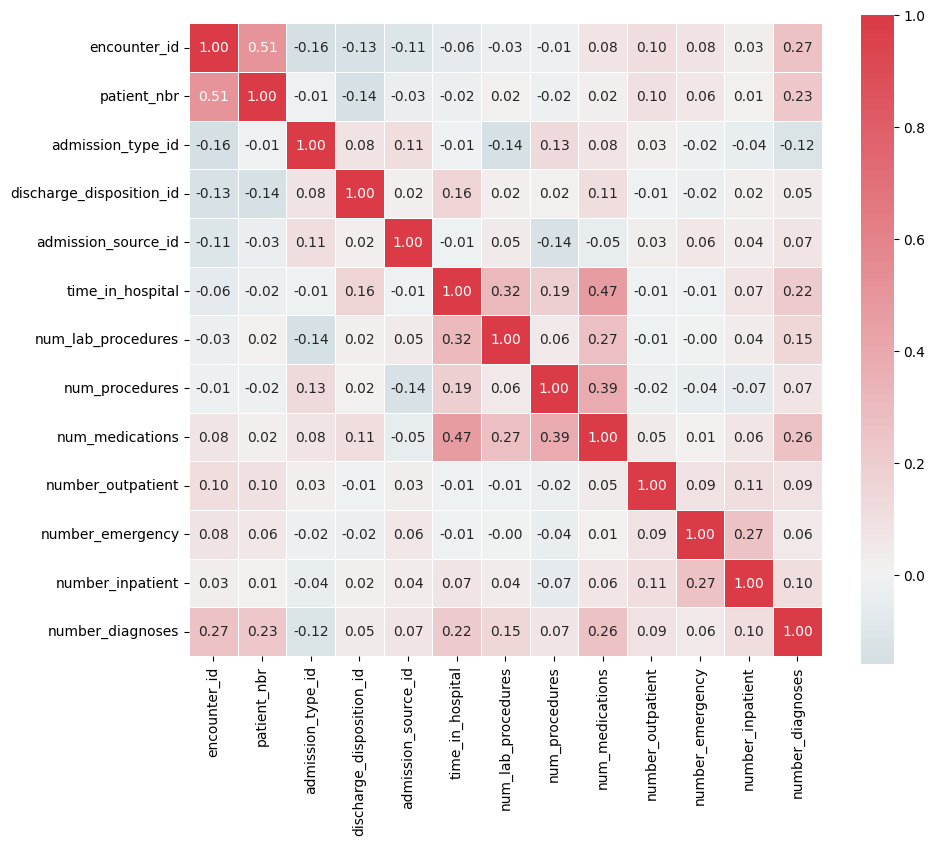

In [ ]:
# creating function for to know how much % of correlation present in this data

def HeatMap(df,x=True):
    # Filter for numeric columns before calculating correlation.
    numeric_df = df.select_dtypes(include=np.number)
    correlations = numeric_df.corr()
    ## Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(10, 10))
    fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
    fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
    fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
    plt.tight_layout()
    plt.show()

HeatMap(diabetes,x=True)

### There is no highly corrolated feature in this data set.

In [ ]:
# separating data of by insulin levels which is administered in the hospital in patient department

df = diabetes.groupby(["insulin"]).size().sort_values(ascending = False)
Steady = diabetes.loc[diabetes["insulin"]=="Steady"].count()[0]
Down = diabetes.loc[diabetes["insulin"]=="Down"].count()[0]
Up = diabetes.loc[diabetes["insulin"]=="Up"].count()[0]

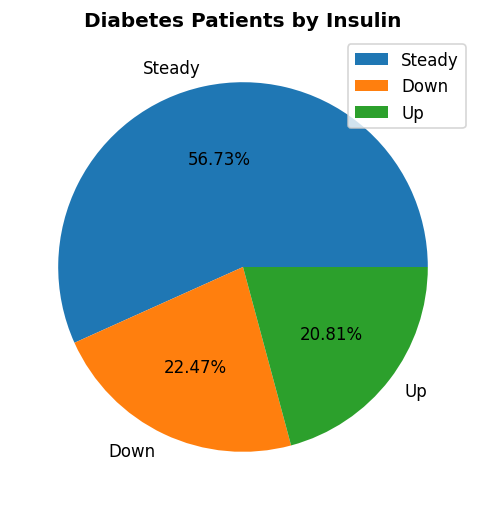

In [ ]:
plt.figure(figsize = [5,5], dpi = 120)
labels = ["Steady", "Down", "Up"]

plt.pie([Steady, Down, Up], labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients by Insulin", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

# Majority of patients have insulin level steady

In [ ]:
#data of patient medication adherence

df = diabetes.groupby(["diabetesMed"]).size().sort_values(ascending = False)
Yes = diabetes.loc[diabetes["diabetesMed"]=="Yes"].count()[0]
No = diabetes.loc[diabetes["diabetesMed"]=="No"].count()[0]

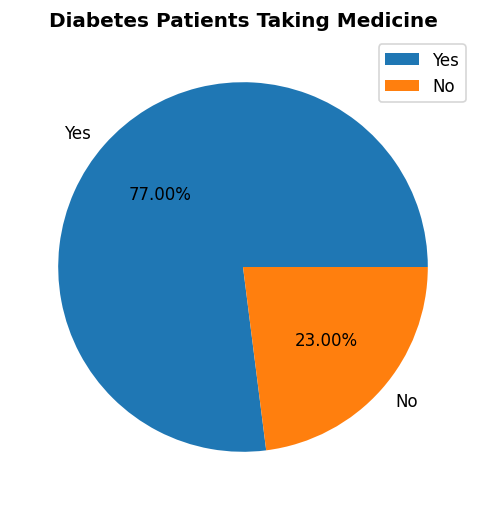

In [ ]:
plt.figure(figsize = [5,5], dpi = 120)
labels = ["Yes", "No"]

plt.pie([Yes, No], labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients Taking Medicine", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

# 77% of patients are taking their medicines while 23% are not taking medicine. Good Medication Compliance

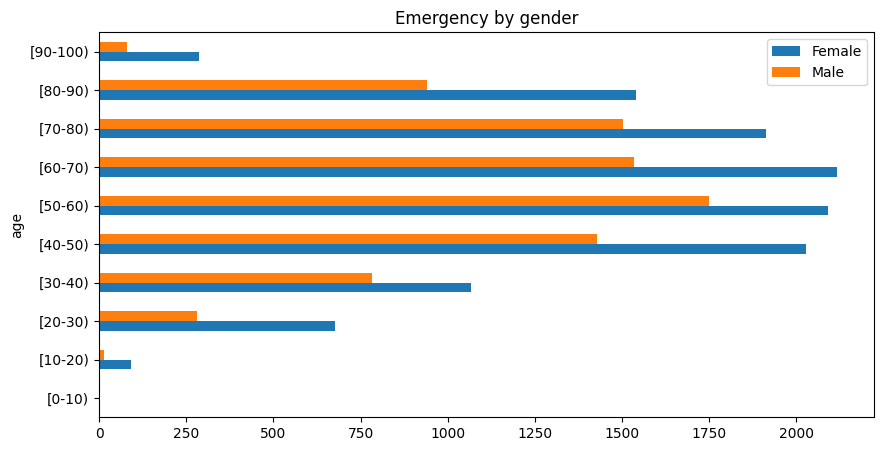

In [ ]:
##Total emergency admisions by gender:

d1 = diabetes[diabetes.gender=='Female'].groupby('age').agg({'number_emergency' : ['sum']})
d1 = pd.DataFrame(d1)
d1.droplevel(0, axis=1)
d1.columns = ['Female']

d2 = diabetes[diabetes.gender=='Male'].groupby('age').agg({'number_emergency' : ['sum']})
d2 = pd.DataFrame(d2)
d2.droplevel(0, axis=1)
d2.columns = ['Male']
d1 = d1.join(d2)
d1.plot.barh(figsize=(10,5), legend=True, title="Emergency by gender");
del d1, d2

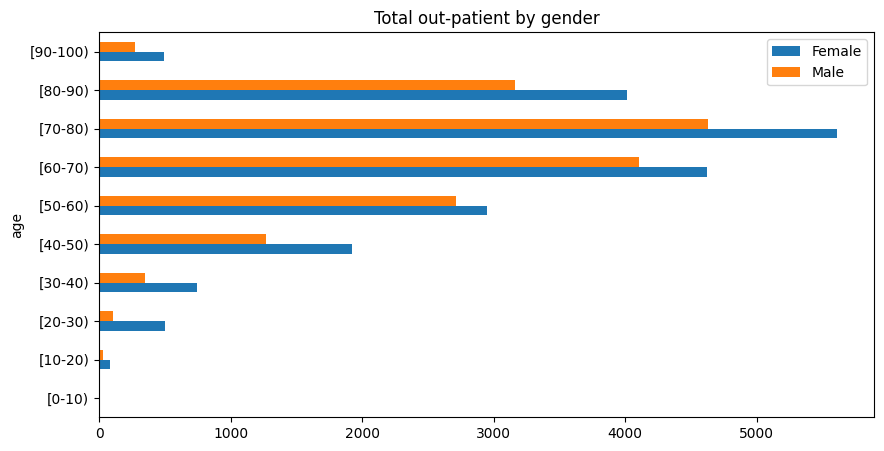

In [ ]:
##Total outpatient by gender, merging two types of data for easy visualization:

d1 = diabetes[diabetes.gender=='Female'].groupby('age').agg({'number_outpatient' : ['sum']})
d1 = pd.DataFrame(d1)
d1.droplevel(0, axis=1)
d1.columns = ['Female']

d2 = diabetes[diabetes.gender=='Male'].groupby('age').agg({'number_outpatient' : ['sum']})
d2 = pd.DataFrame(d2)
d2.droplevel(0, axis=1)
d2.columns = ['Male']
d1 = d1.join(d2)
d1.plot.barh(figsize=(10,5), legend=True, title="Total out-patient by gender");
del d1, d2

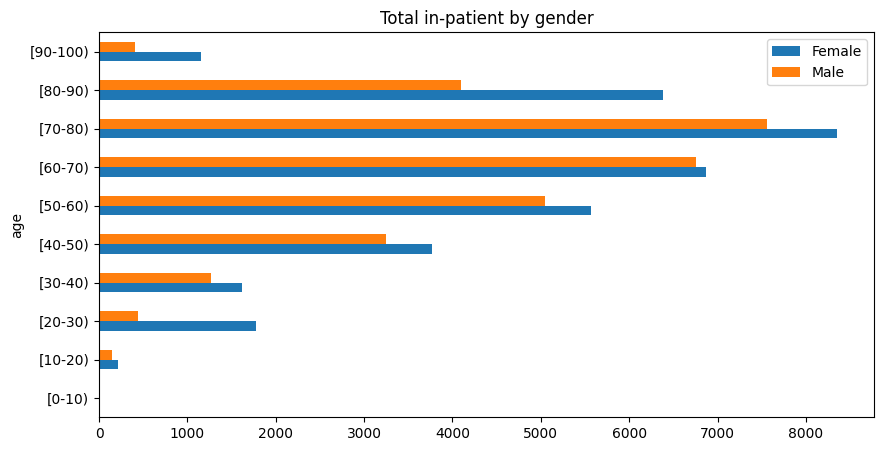

In [ ]:
##Total inpatient by gender

d1 = diabetes[diabetes.gender=='Female'].groupby('age').agg({'number_inpatient' : ['sum']})
d1 = pd.DataFrame(d1)
d1.droplevel(0, axis=1)
d1.columns = ['Female']

d2 = diabetes[diabetes.gender=='Male'].groupby('age').agg({'number_inpatient' : ['sum']})
d2 = pd.DataFrame(d2)
d2.droplevel(0, axis=1)
d2.columns = ['Male']
d1 = d1.join(d2)
d1.plot.barh(figsize=(10,5), legend=True, title="Total in-patient by gender");
del d1, d2

## KEY Findings of Part A

* Distribution of encounters by Race - Mostly Caucasian followed by African American
* Distribution of encounters by Gender - Almost roughly an equal split between Male and Female
* Distribution of encounters by Age - 90% are from 50 years and above age group
* Total emergencies by gender - 60-70 age groups males and females have relatively highest emergencies reported
* Total inpatient/outpatient by gender - 70-80 age groups males and females have relatively highest in/out-patients reported
* Average number of Diagnoses increase significantly during early age but becomes steady between 7-8 procedures after 60 year of age.
* Average number of Lab Procedures are almost similar for all age groups with slight increase above age of 70
* The dosage of these medicines were neither increased nor decreased in patients : metformin.pioglitazone, metformin.rosiglitazone, glimepiride.pioglitazone, glipizide.metformin, troglitazone, tolbutamide, acetohexamide
* The dosage of these medicines have not been used in any patients in the given sample : citoglipton, examide
* Other medicines showed almost equal distribution in terms of steady dosage or increase/decrease amongst 50 years and above patients
* 77% of patients are taking their medicines while 23% are not taking medicine.

# Part B

This dataset has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet and approved by a doctor.

Content Attribute information:

1) Age: 20-65 2) Sex: Male/Female 3) Polyuria: Yes/No 4) Polydipsia: Yes/No 5) sudden weight loss: Yes/No 6) weakness: Yes/No 7) Polyphagia: Yes/No 8) Genital thrush: Yes/No 9) visual blurring: Yes/No 10) Itching: Yes/No 11) Irritability: Yes/No 12) delayed healing: Yes/No 13) partial paresis: Yes/No 14) muscle stiffness: Yes/No 15) Alopecia: Yes/No 16) Obesity: Yes/No 17) Class: Positive/Negative

from the above data we are going to focus on what type of symptoms are more prevalent in Diabetic patients and which age is group is mostly affected. This data is very useful for prevention management based on the symptomatic precautions.


In [ ]:
diabetes_symp.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Changing the column names to fill spaces with underscores, such as Genital thrush to Genital_thrush

In [ ]:
#Changing the column names to fill spaces with underscores, such as Genital thrush to Genital_thrush

diabetes_symp.columns = ['Age','Gender','Polyuria','Polydipsia','sudden_weight_loss','weakness','Polyphagia',
              'Genital_thrush','visual_blurring','Itching','Irritability','delayed_healing',
              'partial_paresis','muscle_stiffness','Alopecia','Obesity','class']
diabetes_sym = diabetes_symp.replace(['Male','Female','Yes','No','Positive','Negative'],(1,0,1,0,1,0))
diabetes_sym.head()

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
# creating numeric function for ease access of numeric data

def create_numeric_feature(input_diabetes_sym):
    use_columns = diabetes_sym_columns
    return input_diabetes_sym[use_columns].copy()

In [ ]:
#knowing mean,std,min and other parameters in this data
diabetes_sym.describe()



,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#knowing which data is repeated frequently on count
import numpy as np
diabetes_symp.describe(include = object).transpose()

,count,unique,top,freq
Gender,520,2,Male,328
Polyuria,520,2,No,262
Polydipsia,520,2,No,287
sudden_weight_loss,520,2,No,303
weakness,520,2,Yes,305
Polyphagia,520,2,No,283
Genital_thrush,520,2,No,404
visual_blurring,520,2,No,287
Itching,520,2,No,267
Irritability,520,2,No,394


In [ ]:
#here we shall recategorize the categories of the variable class for easy and simple identification of Diabetes categories.

diabetes_symp['class'].loc[diabetes_symp['class'].isin(['Negative'])] = 0
diabetes_symp['class'].loc[diabetes_symp['class'].isin(['Positive'])] = 1

In [ ]:
#Converting the datatype of class column from object to int.

diabetes_symp['class'] = diabetes_symp['class'].astype(int)

In [ ]:
#Now we shall first do the Univariate Analysis by analysing the data our Target Variable - class.

Target = 'class'
pd.crosstab(diabetes_symp[Target], columns = 'Normalized', normalize = True)

col_0,Normalized
class,
0,0.384615
1,0.615385


## We have approximately 38.46% of 0's and 61.54% of 1's classes in our data it means 61% positive cases.

In [ ]:
#We would categorize the existing variables of our existing dataframe into numerical and categorical variables.

num_cols = diabetes_symp.select_dtypes(include = [np.number]).columns.tolist()
obj_cols = diabetes_symp.select_dtypes(exclude = [np.number]).columns.tolist()

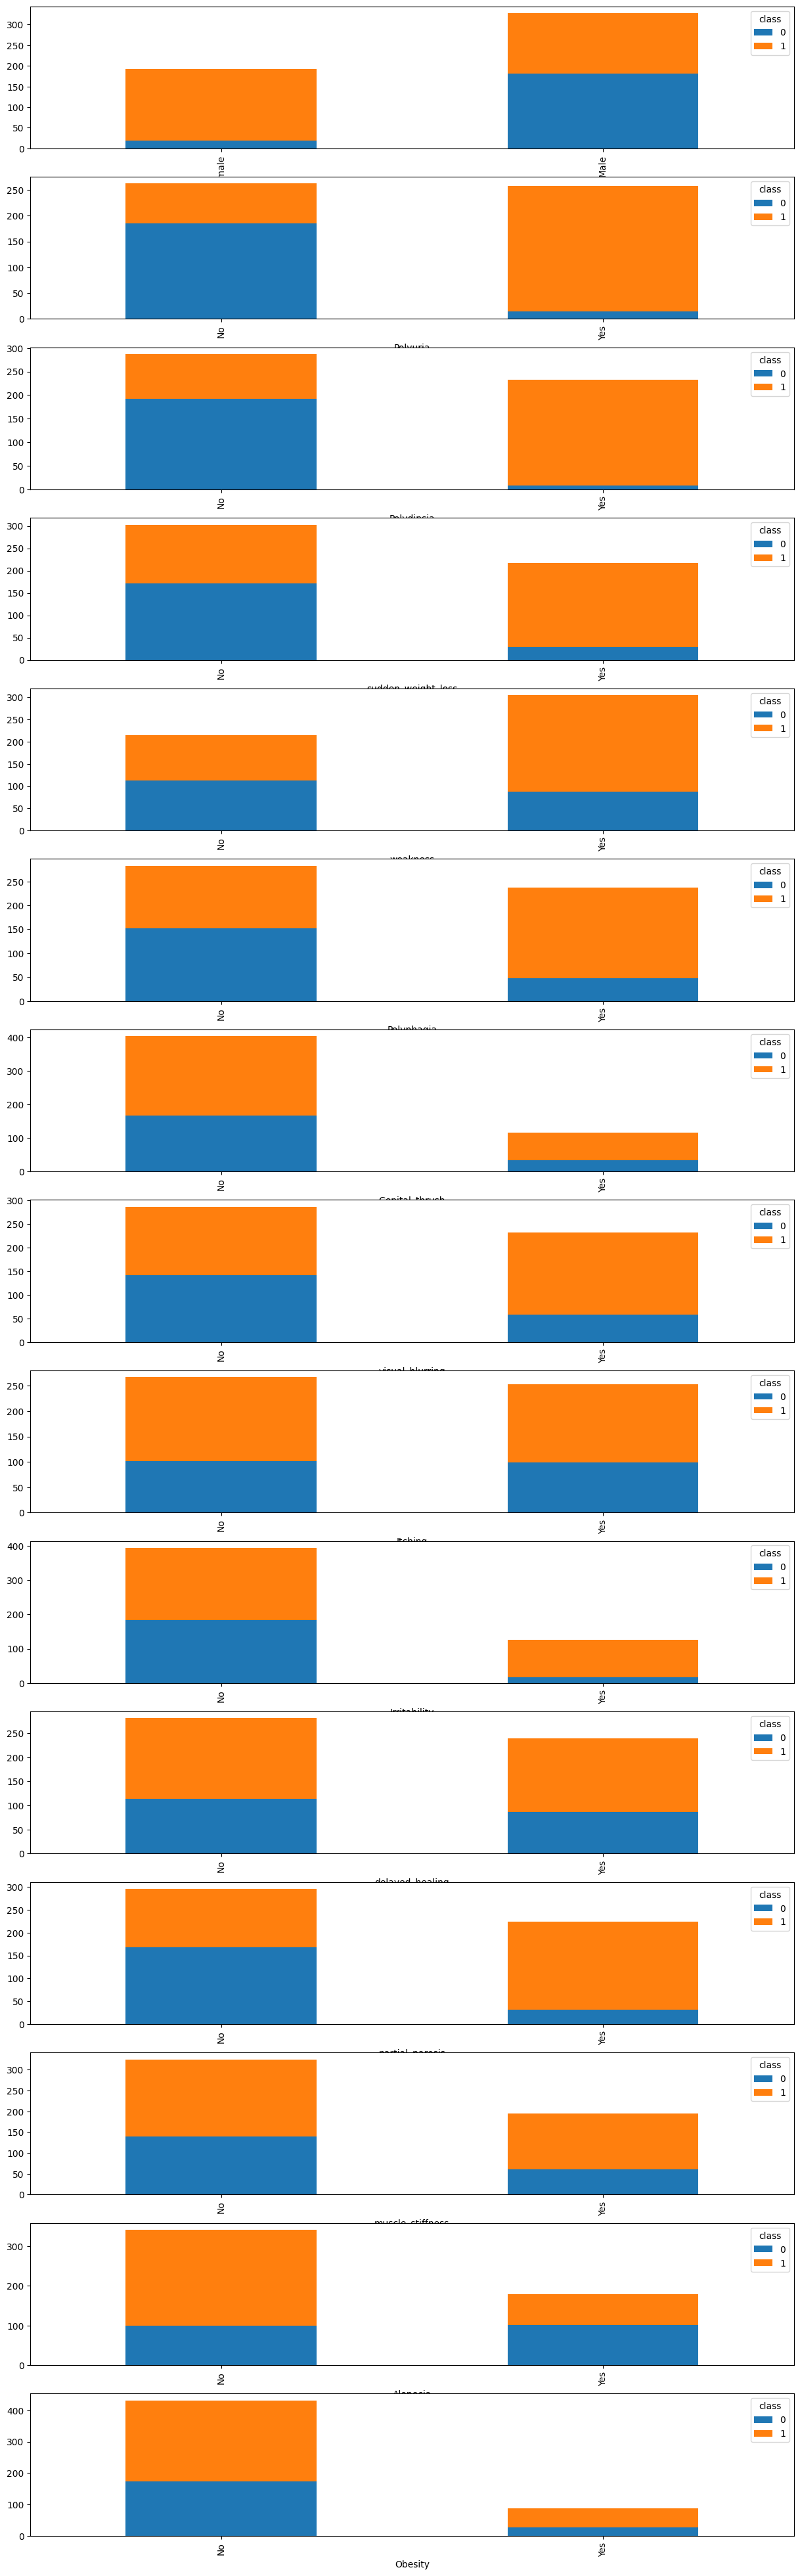

In [ ]:
#Analysis of each category of the categorical variables of obj_cols dataframe Target variable - class.

obj_cols_viz = obj_cols
fig, axes = plt.subplots(len(obj_cols_viz), sharex = False, sharey = False, figsize = (15, 50))

for i in range(0, len(obj_cols_viz)):
    pd.crosstab(diabetes_symp[obj_cols_viz[i]], diabetes_symp[Target]).plot(kind = 'bar', stacked = True, grid = False, ax = axes[i])


## Following are the insights gathered from the above data
* Females are more prone to have Diabetes as compared to males.
* Persons having Polyuria are more prone to have Diabetes as compared to those not having Polyuria.(49.62%)
* Persons having Polydipsia are more prone to have Diabetes as compared to those not having Polydipsia.(44.81%)
* Persons experiencing sudden weight loss are more prone to have Diabetes as compared to those not experiencing any kind of sudden weight loss.(41.73%)
* Persons having weakness are more prone to have Diabetes as compared to those not having any weakness.(58.65%)
* Persons having Polyphagia are more prone to have Diabetes as compared to those not having Polyphagia.(45.58%)
* Persons experiencing Genital thrush are more prone to have Diabetes as compared to those not experiencing any kind of Genital thrush.(22.31%)
* Persons experiencing visual blurring are more prone to have Diabetes as compared to those not experiencing any kind of visual blurring.(44.81%)
* Persons experiencing any kind of Irritability are more prone to have Diabetes as compared to those not experiencing any kind of Irritability.(24.23%)
* Persons having partial paresis are more prone to have Diabetes as compared to those not having partial paresis.(43.08%)
* Persons experiencing any kind of muscle stiffness are more prone to have Diabetes as compared to those not experiencing any kind of muscle stiffness.(37.50%)
* Persons having Obesity are more prone to have Diabetes as compared to those not having Obesity.(16.92%)
### So, overall we can say that a person who is a Female and has either Polyuria, Polydipsia or Polyphagia, and is also experiencing weakness, Genital thrush, visual blurring, Irritability, partial paresis or muscle stiffness and also experiences either a sudden weight loss or is an Obese person is more prone to have Diabetes.

# Part C
* This dataset shows health conditions and contributing causes mentioned in conjunction with deaths involving coronavirus disease 2019 (COVID-19) by age group and jurisdiction of occurrence.

In [ ]:
covid_dm = pd.read_excel('covid19_deaths_dm.xlsx')
covid_dm.head(3)

In [ ]:
#creating a age group to know the which age is mostly afftected

covid_new = covid_dm.groupby(["Age Group"]).size()
df3 =pd.DataFrame(covid_new)
df3.columns = ["count"]
df3

#### almost every age group is affected by COVID 19

In [ ]:
#finding of how many deaths are due DM risk and other conditions

covid_dia_deaths = covid_dm.groupby(["Condition Group"]).size()
df4 =pd.DataFrame(covid_dia_deaths)
df4.columns = ["count"]

In [ ]:
#creating new data with the condition and its %

df4["pct"] = (df4["count"]/df4["count"].sum())*100
df4

### High number of people are dies because of heart related complications and followed by respiratory diseases and Diabetes and other complications

In [ ]:
#visualization of different comorbidies and its related covid 19 deaths

num_dia = pd.DataFrame(covid_dm["COVID-19 Deaths"].groupby(covid_dm["Condition Group"]).mean())
l1 = list(num_dia.index.values)
l2 = list(num_dia["COVID-19 Deaths"])

In [ ]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.barh(l1,l2, color = "navy", hatch = "+")
plt.ylabel("Average Number of Deaths ---->", fontdict = { "fontsize": 12})
plt.xlabel("condition Group  ---->", fontdict = {"fontsize": 12})

plt.title("Average Number of deaths by different conditions ", fontdict = {"fontweight": "bold"})

plt.show()

### From the above data we can observe that more number of deaths due to respiratory system related comorbidies followed by the Diabetes, so that we can assume that diabetes is a risk factor for covid 19 death. People with DM should take many precautions to be health and maintain hygiene for not afftected by COVID19.

In [ ]:
#description of overall data of covid 19 death with comorbidies

covid_dm.describe(include = np.object).transpose()

### Data Merging of 2 data sets

In [ ]:
#comparing age groups in 2 different data sets

combine_ac = pd.concat([diabetes, covid_dm], axis =1)
combine_ac



In [ ]:
## Data Aggregation: knowing facts about covid 19 deaths in this data using aggregate

combine_ac.aggregate({"COVID-19 Deaths": ['sum', 'min','max']})

## overall more than 49 million people are dies because of covid 19 with associated risk factors

In [ ]:
## Data merging: merging of 2 data sets using concat

combine_ab = pd.concat([diabetes_sym, diabetes ], axis =1)
combine_ab


In [ ]:
## Data Aggregation: finding min and max age group in this data

combine_ab.aggregate({"Age": ['min','max']})

## The min age in this data is 16 and the max is 90 years

In [ ]:
##Data Transformation: knowing the data of number of mentions in records comparing with covid 19 deaths

combine_ac.groupby('COVID-19 Deaths')['Number of Mentions'].transform('sum')

### from the above transformation we can observe that number covid 19 deaths overall records mentioned in it

In [ ]:
#the overall symptomatic and diabetes data was combined and mentioned
combine_ab.describe()

## The mean age of every data set is 48.02 it indicates the patients above the age of 45 are more prone to get DM and they must take precautions, regular excercise and diet maintainace.

# Summary
### Problem applicability



Males have a higher likelihood of developing diabetes compared to females. Additionally, individuals aged 50 and older are more prone to diabetes, with this age group showing a significant increase in diagnoses compared to younger populations. Among racial and ethnic groups, people in this age range also have a higher likelihood of being affected. On average, the number of diabetes diagnoses rises sharply before the age of 60 but then stabilizes at around 7–8 procedures.

Adherence to prescribed medications plays a critical role in diabetes management, with 77% of patients following their medication regimen, compared to 23% who do not. Poor medication adherence significantly increases the risk of diabetes-related complications. Furthermore, individuals exhibiting symptoms like polyuria and polydipsia are more likely to be diagnosed with diabetes. Diabetes is also a significant risk factor for severe outcomes from COVID-19, including hospitalization and death.

People with diabetes mellitus (DM) are strongly advised to maintain good hygiene, adopt preventative measures, and minimize their risk of contracting COVID-19. The average age across the datasets is 48.02 years, which suggests that individuals over 45 are more susceptible to developing diabetes. Regular exercise and a healthy diet are essential preventive strategies for this demographic.

The ongoing COVID-19 pandemic has emphasized the importance of type 2 diabetes prevention and management. Adults with underlying medical conditions such as heart disease, chronic lung disease, and diabetes are at a heightened risk of severe illness from COVID-19. This increased risk often necessitates hospitalization, intensive care, ventilator support, or may even result in death.

Early data reported to the CDC from January to May 2020 revealed that COVID-19 hospitalizations were six times higher and deaths were 12 times higher among individuals with underlying conditions like diabetes. Other contributing factors, including advanced age, multiple underlying medical conditions, and lower socioeconomic status, further exacerbate the risk of severe illness and adverse outcomes from COVID-19.

### References:

1. Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

2. COVID-19 Was Leading Cause of Death for People With Diabetes at End of 2020 BY QUINN PHILLIPS | JUNE 14, 2022

Useful links:

* HealthData.gov :

Documentation: https://healthdata.gov/dataset/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/uvkj-kpue

Data: https://data.cdc.gov/api/views/hk9y-quqm/rows.csv?accessType=DOWNLOAD


* UCI Data set:

Documentation: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip


* Kaggle web site data:

Data: https://www.kaggle.com/datasets/alakaaay/diabetes-uci-dataset

    